# <h1 style="text-align: center;">Breast_Cancer Risk Prediction</h1>

## Problem Statement 

Develop comprehensive survival analysis models and a robust machine learning model to accurately predict 10-year mortality risk for breast cancer patients.
By utilizing these models, the institute aims to improve treatment planning, patient counselling, and overall cancer care strategies.
### Our task is:
- Understand the underlying pattern in dataset
- Handle missing values
- Use feature engineering and label encoding to improve model performance
- Build a machine learning model to predict 10 years mortality risk


## Step 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## Step 2. Import the dataset

In [4]:
data_Frame = pd.read_csv(r"C:\Users\hp\Downloads\Breast Cancer METABRIC.csv")

In [5]:
# display few rows of dataset
data_Frame.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


## Step 3. Understanding data

In [6]:
data_Frame.shape

(2509, 34)

In [7]:
data_Frame.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [8]:
data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [9]:
data_Frame.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [10]:
data_Frame.duplicated().sum()

0

In [11]:
data_Frame.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

# Types Of Surgeries

Text(0.5, 1.0, 'Types of surgeries')

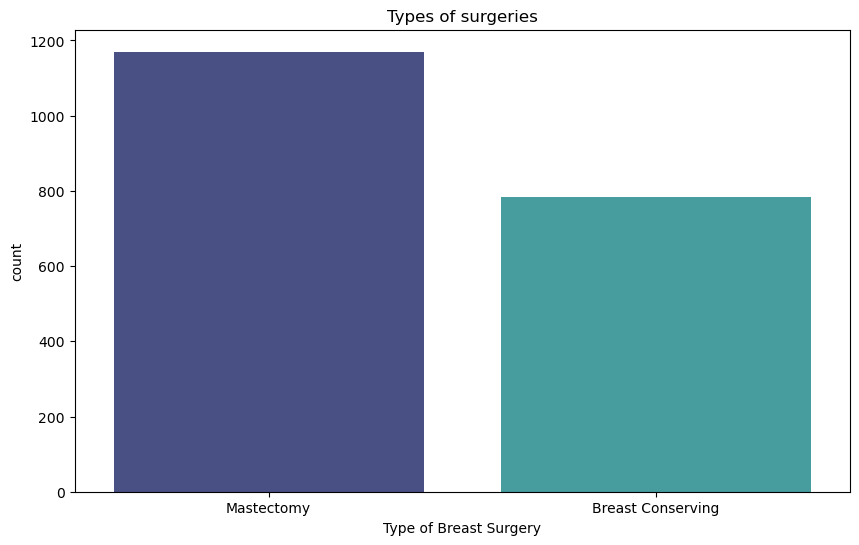

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type of Breast Surgery', data=data_Frame, palette='mako')
plt.title('Types of surgeries')

#### Mastectomy :

- A surgical procedure where the entire breast is removed, sometimes including nearby structures like lymph nodes, chest wall muscles, or skin.
- A surgical procedure where the entire breast is removed, sometimes including nearby structures like lymph nodes, chest wall muscles, or skin.

#### Breast-Conserving Surgery :

- A surgery that removes only the cancerous part of the breast and a small margin of surrounding tissue while preserving most of the breast.
- A surgery that removes only the cancerous part of the breast and a small margin of surrounding tissue while preserving most of the breast.

NOTE : Both are effective, and the choice depends on the tumor size, location, patient preference, and overall treatment plan.

Text(0.5, 1.0, 'Cancer type Detailed')

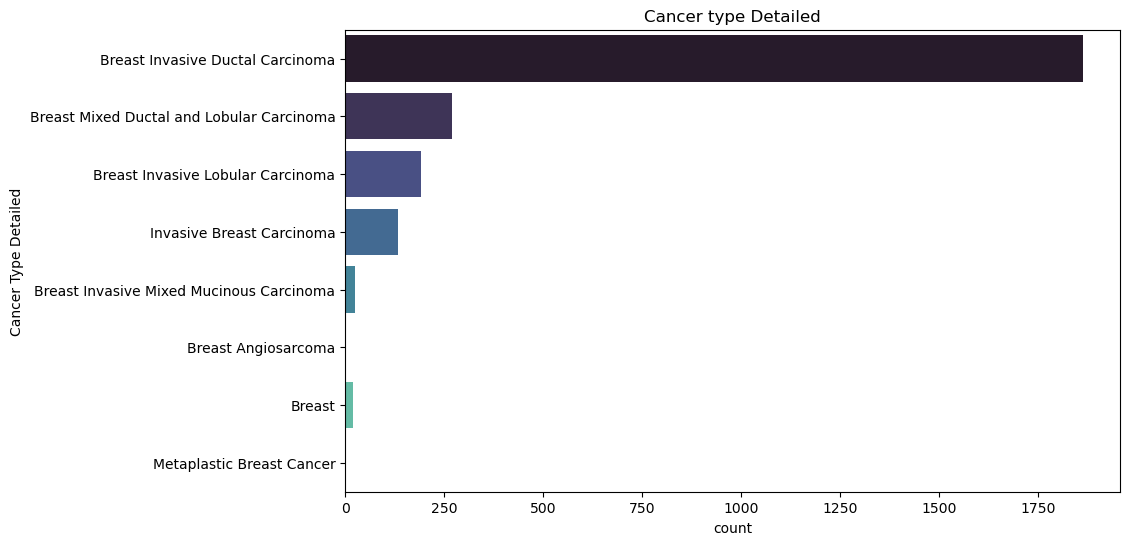

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y='Cancer Type Detailed', data=data_Frame, color='brown', palette='mako')
plt.title('Cancer type Detailed')

### Breast Invasive Ductal Carcinoma

The most common type of breast cancer, starting in the milk ducts and invading surrounding breast tissue.
 
Key Features:
- Makes up 70-80% of all breast cancers.
- Can spread to lymph nodes and other parts of the body.
    
 Symptoms: Lump in the breast, skin changes, or nipple discharge.


### Breast Invasive Lobular Carcinoma

Cancer that begins in the milk-producing lobules and spreads to surrounding tissues.

Key Features:
- Second most common invasive breast cancer (~10-15% of cases).
- Often harder to detect on imaging and can present as thickening rather than a lump.

### Breast Mixed Ductal and Lobular Carcinoma

A combination of invasive ductal carcinoma (IDC) and invasive lobular carcinoma (ILC).

Key Features:
- Less common.
- Behaves like a mix of both IDC and ILC, with unique challenges for treatment.

### Invasive Breast Carcinoma

 A general term for breast cancers that invade surrounding tissues, including IDC, ILC, and other subtypes.
               
Key Features:
- Indicates the ability to spread beyond the original tissue of origin.


### Breast Invasive Mixed Mucinous Carcinoma

 A rare type of breast cancer that combines mucinous carcinoma (characterized by mucus production) with other invasive cancer types like IDC.

 Key Features:
- Typically less aggressive than other invasive cancers.
- Good prognosis if diagnosed early.


### Breast (General)


Refers broadly to breast cancer without specifying a subtype.
Key Features: 
- May indicate incomplete or generalized information about the cancer type or stage.

### Breast Angiosarcoma

A rare and aggressive cancer that develops in the blood vessels or lymph vessels within the breast.

Key Features:
- Often linked to prior radiation therapy (secondary angiosarcoma).
- Rapid growth and poor prognosis.

### Metaplastic Breast Cancer

A rare and heterogeneous type of breast cancer where cells change (metaplasia) into a different cell type, such as squamous or spindle cells.

Key Features:
- Less responsive to standard treatments like chemotherapy.
- Tends to be more aggressive than IDC.

# Tumor Stages

Text(0.5, 1.0, 'Tumor Stages')

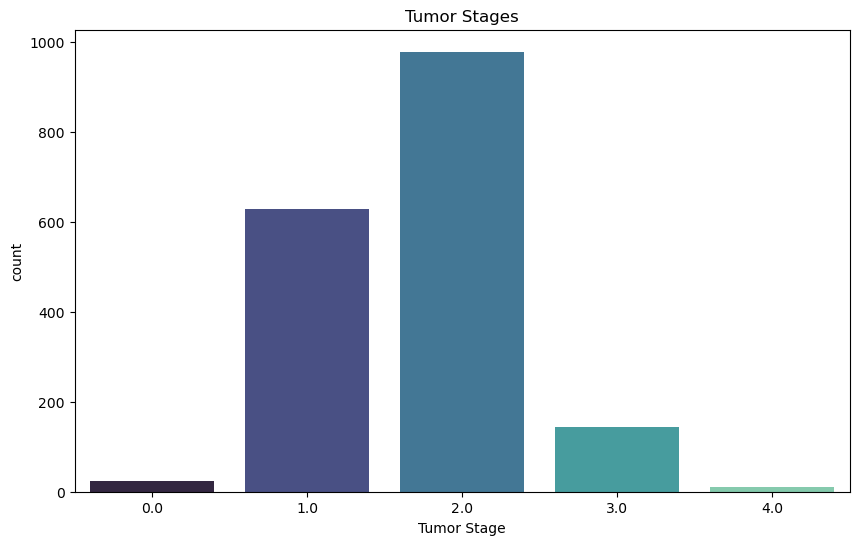

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Tumor Stage', data=data_Frame, color='brown', palette='mako')
plt.title('Tumor Stages')

As observed from the above graph, the majority of individuals are classified in the second stage of cancer.

# Feature Engineering

In [15]:
# Duration Column
data_Frame['Overall Survival Status'] = data_Frame['Overall Survival Status'].fillna(
    data_Frame['Overall Survival Status'].mode()[0]
)

In [16]:
data_Frame['Overall Survival (Months)'] = data_Frame.groupby(
    ['Cancer Type Detailed', 'Overall Survival Status']
)['Overall Survival (Months)'].transform(lambda x: x.fillna(x.mean()))
data_Frame['Overall Survival (Months)'] = data_Frame['Overall Survival (Months)'].fillna(data_Frame['Overall Survival (Months)'].mean())

In [17]:
data_Frame['Relapse Free Status'] = data_Frame.groupby(['Cancer Type Detailed'])['Relapse Free Status'].apply(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
).reset_index(drop=True)

data_Frame['Relapse Free Status (Months)'] = data_Frame.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].apply(
    lambda x: x.fillna(x.mean())
).reset_index(drop=True)

In [18]:
# ER, PR, HER2
data_Frame['ER status measured by IHC'] = data_Frame['ER status measured by IHC'].fillna(
    data_Frame['ER status measured by IHC'].mode()[0]
)
data_Frame['ER Status'] = data_Frame.groupby('ER status measured by IHC')['ER Status'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)
data_Frame['HER2 status measured by SNP6'] = data_Frame['HER2 status measured by SNP6'].fillna(
    data_Frame['HER2 status measured by SNP6'].mode().iloc[0] if not data_Frame['HER2 status measured by SNP6'].mode().empty else None
)
data_Frame['HER2 Status'] = data_Frame.groupby('HER2 status measured by SNP6')['HER2 Status'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)
data_Frame['PR Status'] = data_Frame.groupby('Cancer Type Detailed')['PR Status'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)

In [19]:
# chemotherapy, 
data_Frame['Chemotherapy'] = data_Frame.groupby('Cancer Type Detailed')['Chemotherapy'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None))
# Hormone Therapy
data_Frame['Hormone Therapy'] = data_Frame.groupby('Cancer Type Detailed')['Hormone Therapy'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)
# Radio therapy
data_Frame['Radio Therapy'] = data_Frame.groupby('Cancer Type Detailed')['Radio Therapy'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)

In [20]:
data_Frame['Age at Diagnosis'] = data_Frame.groupby('Cancer Type Detailed')['Age at Diagnosis'].transform(
    lambda x: x.fillna(x.mean())
)

data_Frame['Cohort'] = data_Frame.groupby('Cancer Type Detailed')['Cohort'].transform(
    lambda x: x.fillna(x.median())
)

data_Frame['Cellularity'] = data_Frame.groupby('Cancer Type Detailed')['Cellularity'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else None)
)

data_Frame['Tumor Stage'] = data_Frame.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].transform(
    lambda x: x.fillna(x.median())
)

data_Frame['Tumor Stage'] = data_Frame.groupby('Cancer Type Detailed')['Tumor Stage'].transform(
    lambda x: x.fillna(x.median())
)

data_Frame['Tumor Stage'] = data_Frame.groupby('Cancer Type Detailed')['Tumor Stage'].transform(
    lambda x: x.fillna(x.median())
)

data_Frame['Tumor Size'] = data_Frame.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].transform(
    lambda x: x.fillna(x.median())
)

data_Frame['Tumor Size'] = data_Frame.groupby('Cancer Type Detailed')['Tumor Size'].transform(
    lambda x: x.fillna(x.median())
)

data_Frame['Tumor Size'] = data_Frame['Tumor Size'].fillna(
    data_Frame['Tumor Size'].mode().iloc[0] if not data_Frame['Tumor Size'].mode().empty else None
)

data_Frame['Neoplasm Histologic Grade'] = data_Frame.groupby('Cancer Type Detailed')['Neoplasm Histologic Grade'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

# Fill any remaining NaN globally using the overall mode of the column
overall_mode = data_Frame['Neoplasm Histologic Grade'].mode()
if not overall_mode.empty:
    data_Frame['Neoplasm Histologic Grade'] = data_Frame['Neoplasm Histologic Grade'].fillna(overall_mode.iloc[0])

data_Frame['Primary Tumor Laterality'] = data_Frame.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

data_Frame['Tumor Other Histologic Subtype'] = data_Frame.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
).fillna('Ductal/NST')

data_Frame['Mutation Count'] = data_Frame['Mutation Count'].fillna(data_Frame['Mutation Count'].mode().iloc[0])

data_Frame['Nottingham prognostic index'] = data_Frame.groupby(['Tumor Size'])['Nottingham prognostic index'].transform(
    lambda x: x.fillna(x.median())
).fillna(data_Frame['Nottingham prognostic index'].median())

data_Frame['Lymph nodes examined positive'] = data_Frame.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

data_Frame['Lymph nodes examined positive'] = data_Frame['Lymph nodes examined positive'].fillna(data_Frame['Lymph nodes examined positive'].median())

data_Frame['Inferred Menopausal State'] = data_Frame['Inferred Menopausal State'].fillna(
    data_Frame['Inferred Menopausal State'].mode().iloc[0]
)

data_Frame['Pam50 + Claudin-low subtype'] = data_Frame.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

data_Frame['Integrative Cluster'] = data_Frame.groupby(['Cancer Type Detailed'])['Cellularity'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

data_Frame['Type of Breast Surgery'] = data_Frame.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

data_Frame['Primary Tumor Laterality'] = data_Frame.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

data_Frame['3-Gene classifier subtype'] = data_Frame.groupby(['Cancer Type Detailed'])['3-Gene classifier subtype'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
)

In [21]:
data_Frame.drop(columns=["Patient's Vital Status"], inplace=True)

In [22]:
data_Frame.isnull().sum()

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

# Categorical Columns

In [23]:
obj_cols = data_Frame.select_dtypes(include=['object']).columns
print(obj_cols)

Index(['Patient ID', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'ER status measured by IHC', 'ER Status',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Oncotree Code', 'Overall Survival Status',
       'PR Status', 'Radio Therapy', 'Relapse Free Status', 'Sex',
       '3-Gene classifier subtype'],
      dtype='object')


# Label Encoding

In [24]:
for col in obj_cols:
    data_Frame[col] = LabelEncoder().fit_transform(data_Frame[col])

Here we are using a label-encoder to convert all categorical columns into numerical columns as many algorithms require numerical input
and label encoding provides a way to represent categorical values as an integer without losing the essence of original data.

In [25]:
data_Frame['Overall Survival Status'] = data_Frame['Overall Survival Status'].replace({0: 1, 1: 0})
data_Frame['Relapse Free Status'] = data_Frame['Relapse Free Status'].replace({0: 1, 1: 0})
data_Frame.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,0,75.65,1,0,2,0,0,6,1.0,1,...,140.500000,0,0,1,48.16,1,0,2,22.0,2.0
1,1,43.19,0,0,2,0,0,2,1.0,1,...,84.633333,0,1,1,111.32,1,0,0,10.0,1.0
2,2,48.87,1,0,2,0,1,3,1.0,1,...,163.700000,1,1,0,109.61,1,0,0,15.0,2.0
3,3,47.68,1,0,5,2,1,3,1.0,1,...,164.933333,0,1,1,161.61,1,0,1,25.0,2.0
4,4,76.97,1,0,5,0,1,3,1.0,1,...,41.366667,1,1,1,109.01,1,0,0,40.0,2.0


In general living is represented as "0" and deceased as "1" however after label encoding it's doing the opposite,
swaping the values is what we are doing here 

In [26]:
data_Frame['Overall Survival Status'].value_counts()

Overall Survival Status
1    1672
0     837
Name: count, dtype: int64

# Visualization and Exploratory Data Anaysis

<Axes: >

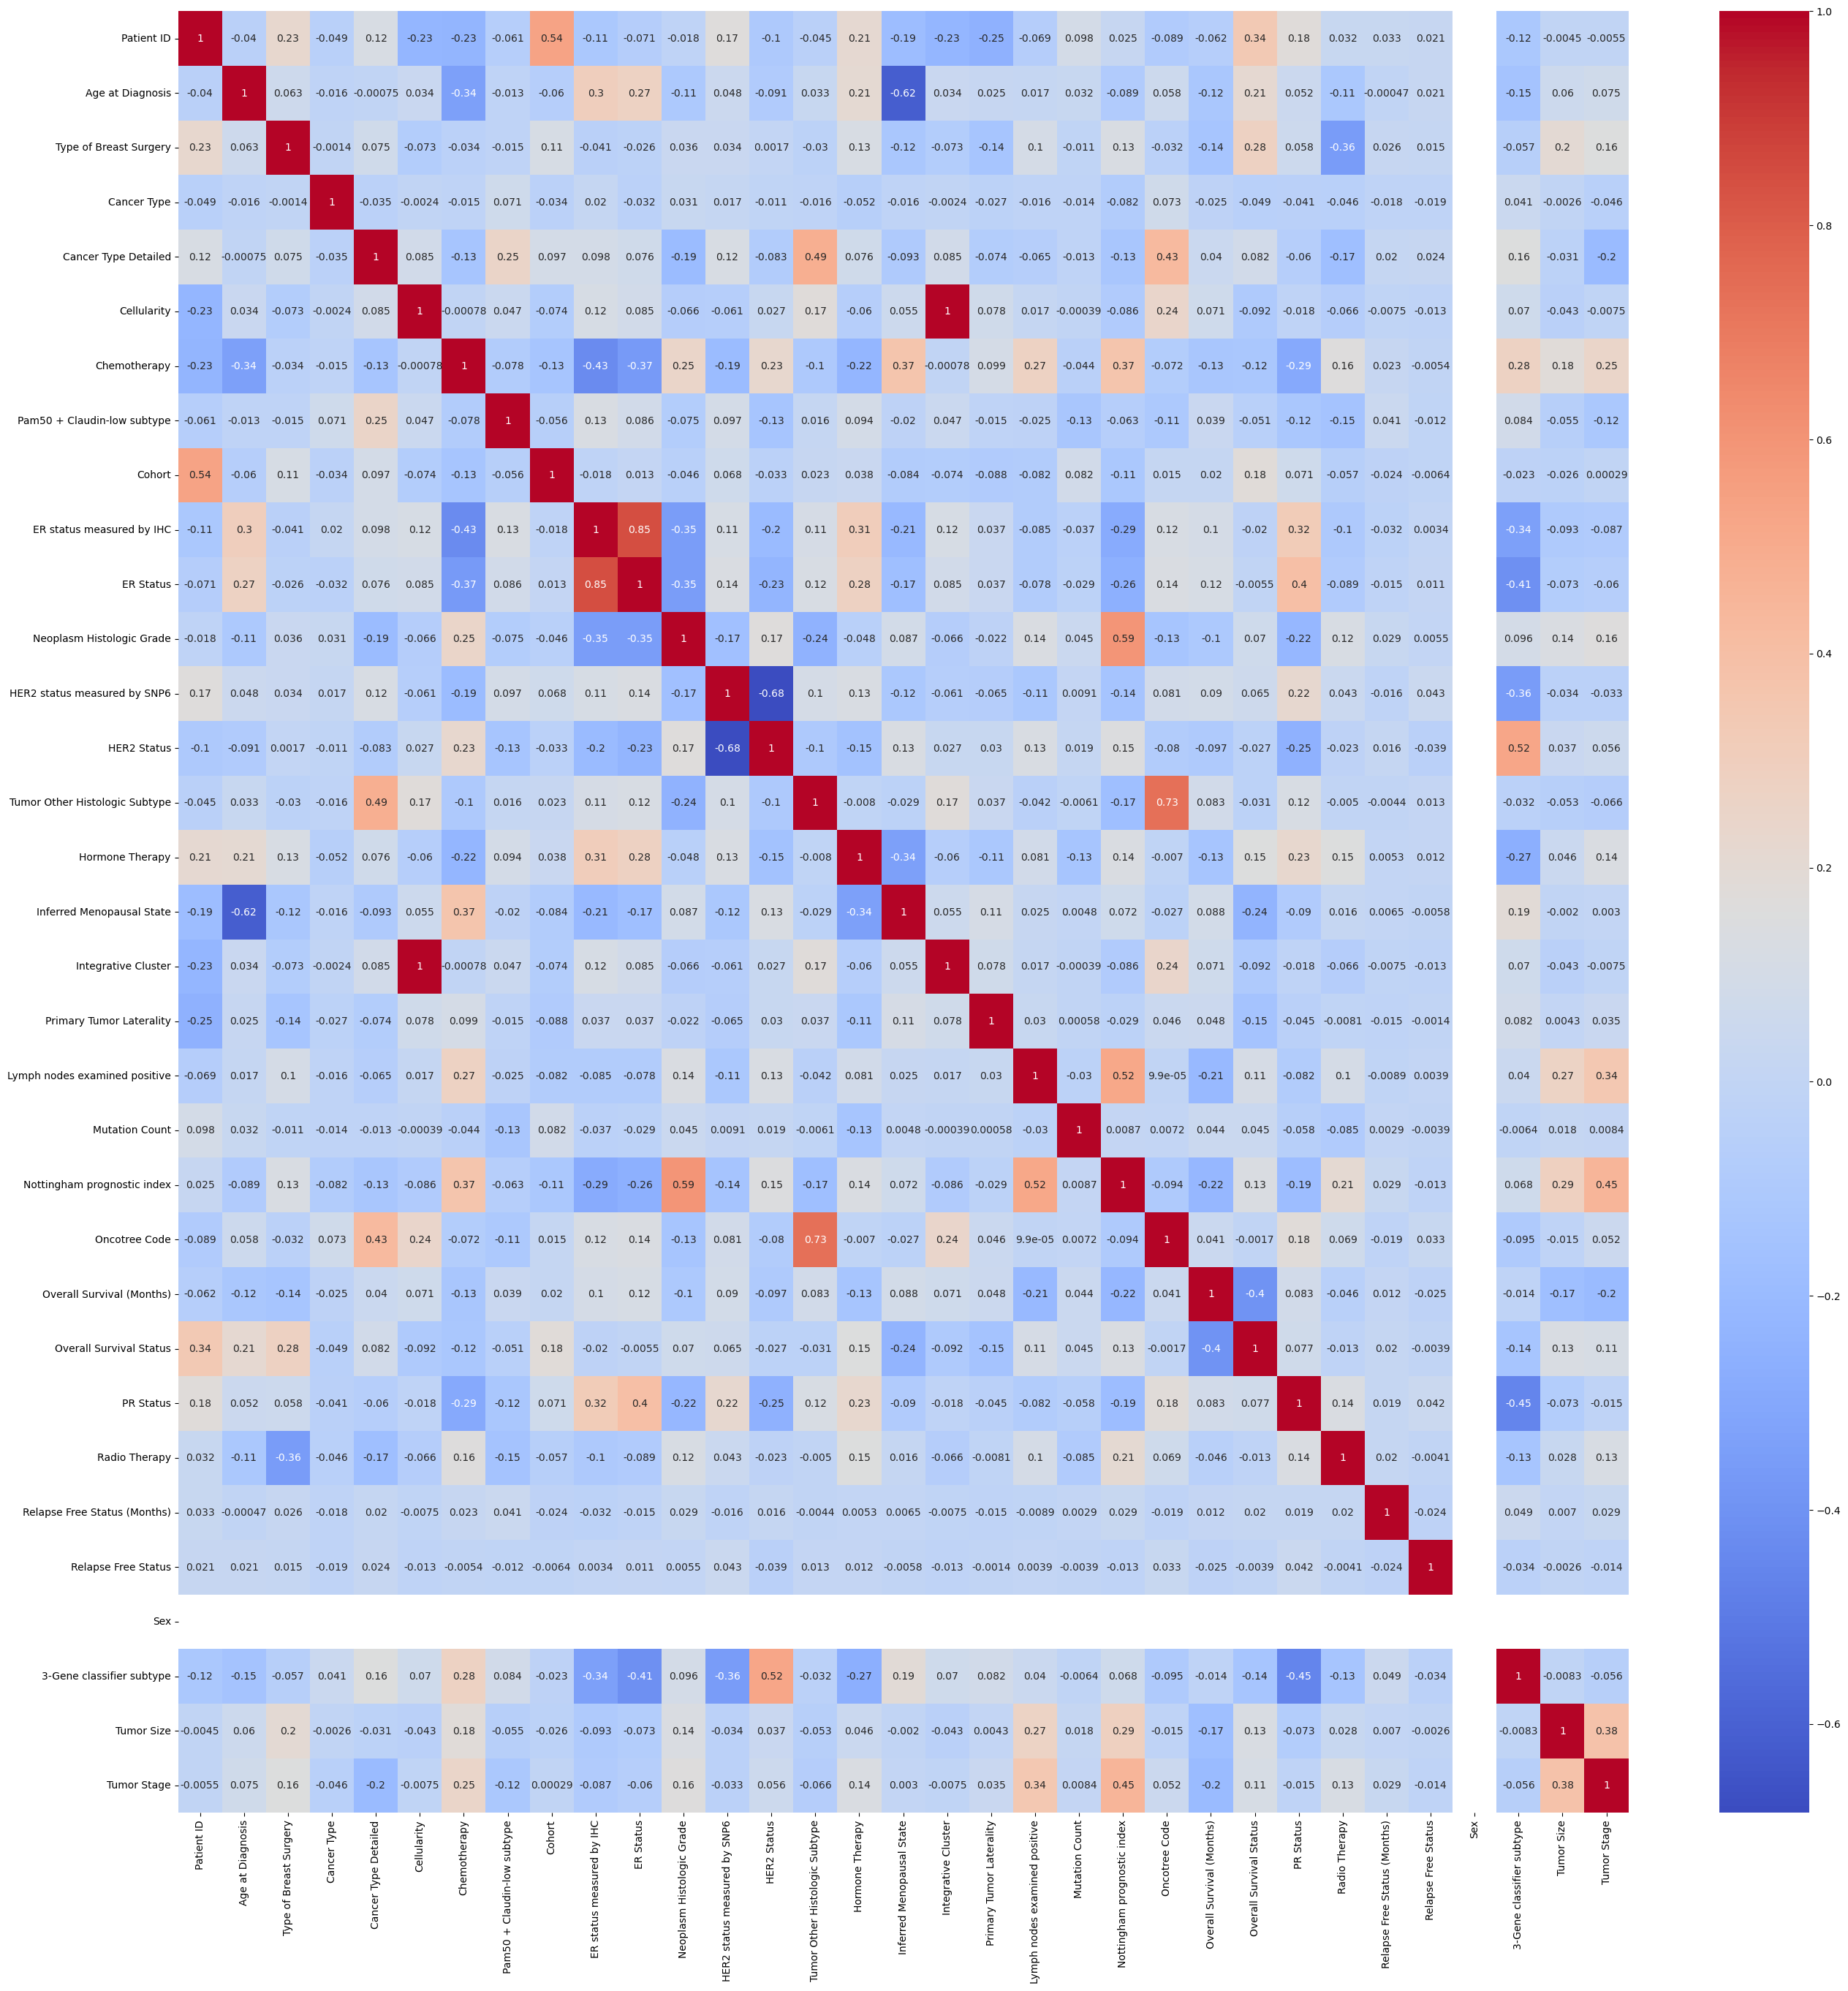

In [27]:
plt.figure(figsize=(32,32), dpi=100) #for better resolution
sns.heatmap(data_Frame.corr(), annot=True, cmap='coolwarm')

This heatmap shows correlations between variables, where the color's intensity indicates the relationship's strength.
Like cellularity, which has a strong relation with the integrative cluster (1), the Oncotree code has a pretty good relation with Tumors and other histologic subtypes (0.73).
And columns like ER, PR, and HER2 how it is affecting other columns.

Text(0.5, 1.0, 'Age of diagnose')

<Figure size 1000x800 with 0 Axes>

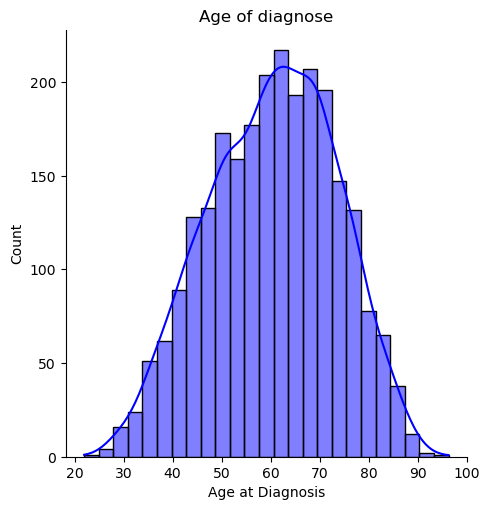

In [28]:
plt.figure(figsize=(10,8))
sns.displot(data_Frame['Age at Diagnosis'], bins=25, kde=True, color='Blue')
plt.title('Age of diagnose')

From the above-displayed plot, the plot spikes the most after 60 hence we can conclude that the chances of having breast cancer increase the most between 60-70

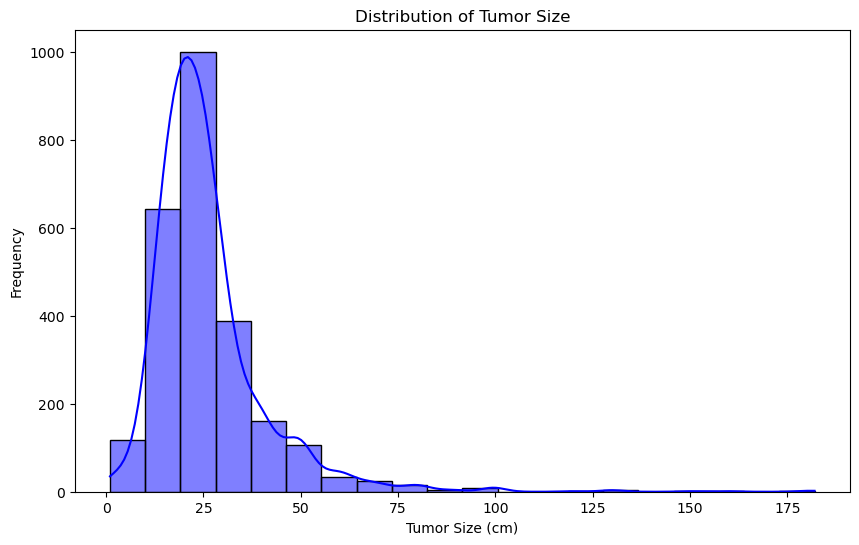

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data_Frame['Tumor Size'], kde=True, color='blue', bins=20)

plt.title('Distribution of Tumor Size')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Frequency')
plt.show()

This plot visualizes how the Tumor Size is distributed in your dataset. Larger tumors typically correlate with worse outcomes, so this insight is key.

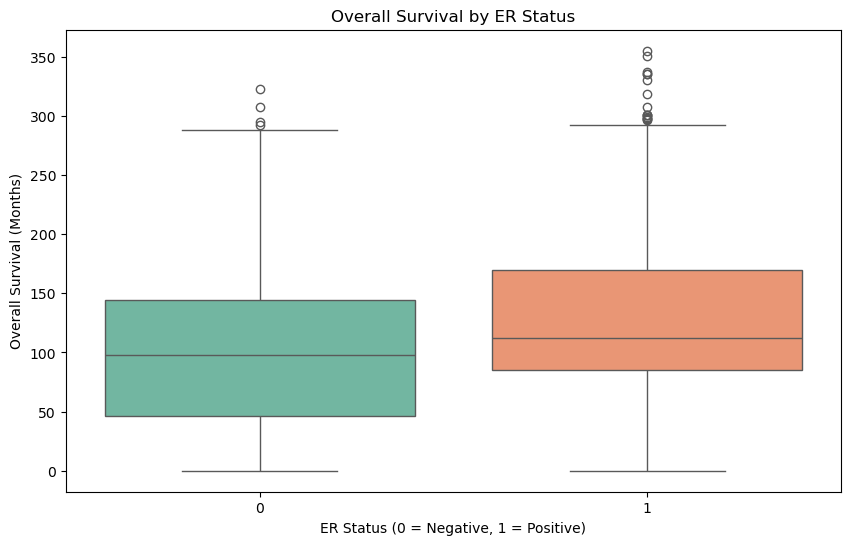

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ER Status', y='Overall Survival (Months)', data=data_Frame, palette="Set2")

plt.title('Overall Survival by ER Status')
plt.xlabel('ER Status (0 = Negative, 1 = Positive)')
plt.ylabel('Overall Survival (Months)')
plt.show()

 ER Status (Estrogen Receptor status) is an important factor in predicting survival, as ER-positive cancers tend to have better outcomes.
From the above box plot, we can conclude that ER-positive patients generally survive longer than ER-negative patients,
this is crucial for understanding how hormone receptor status impacts survival chances.


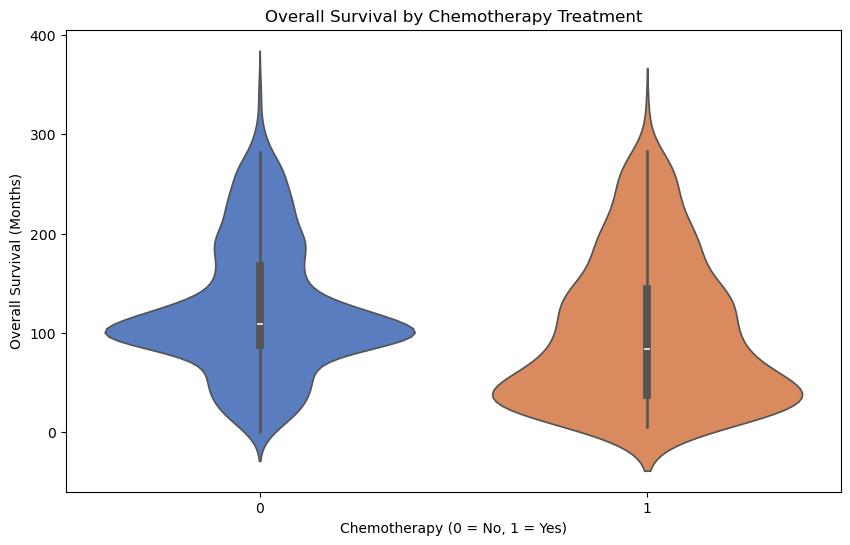

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Chemotherapy', y='Overall Survival (Months)', data=data_Frame, palette='muted')

plt.title('Overall Survival by Chemotherapy Treatment')
plt.xlabel('Chemotherapy (0 = No, 1 = Yes)')
plt.ylabel('Overall Survival (Months)')
plt.show()

This plot evaluates how receiving chemotherapy impacts Overall Survival. Chemotherapy is one of the primary treatments for breast cancer, and this relationship is key for predictive modeling.
The violin plot shows the spread of survival months for both patients who received chemotherapy and those who did not.

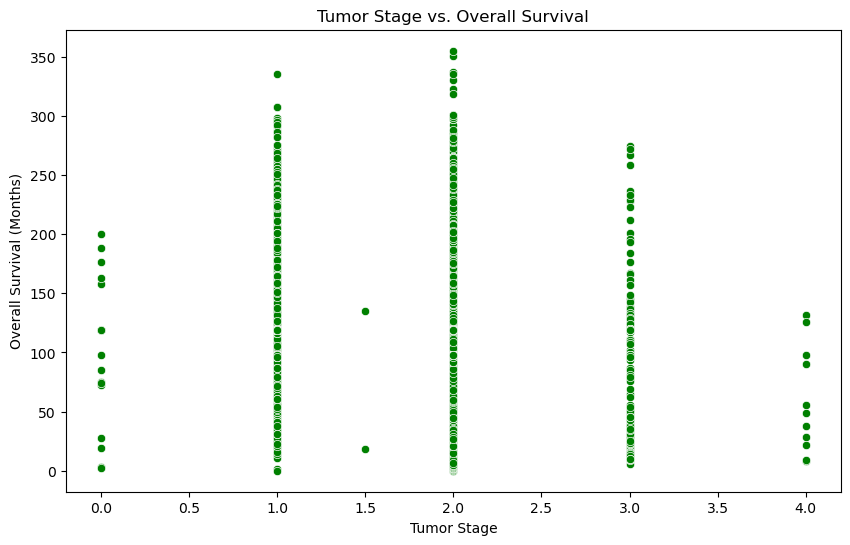

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tumor Stage', y='Overall Survival (Months)', data=data_Frame, color='green')

plt.title('Tumor Stage vs. Overall Survival')
plt.xlabel('Tumor Stage')
plt.ylabel('Overall Survival (Months)')
plt.show()

As the tumor stage often correlates with how far the cancer has spread, this plot will help understand the relationship between Tumor Stage and Overall Survival (Months).
The above plot helps validate the expected trend that earlier-stage cancers typically have higher survival rates.

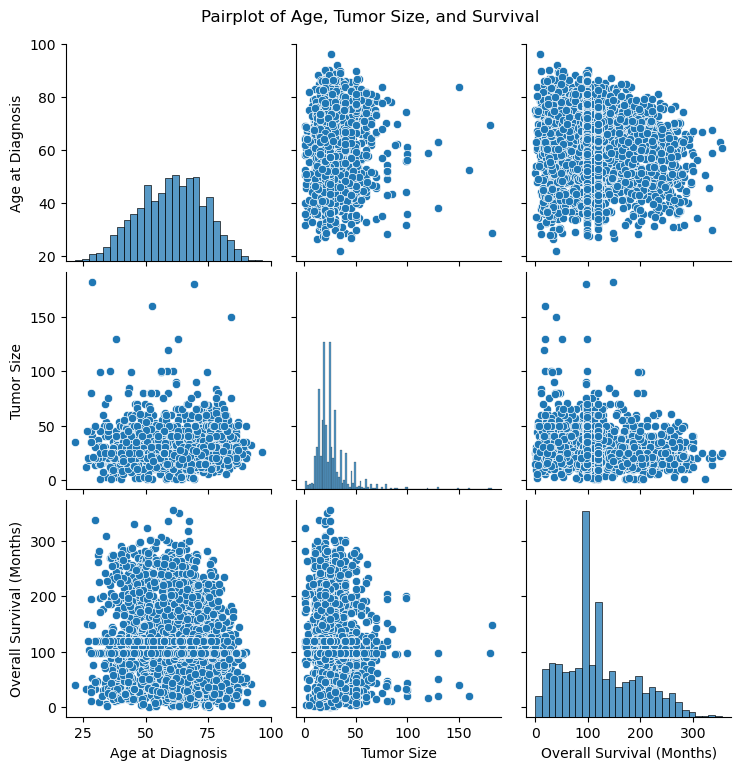

In [33]:
sns.pairplot(data_Frame[['Age at Diagnosis', 'Tumor Size', 'Overall Survival (Months)']])

plt.suptitle('Pairplot of Age, Tumor Size, and Survival', y=1.02)
plt.show()

A pair plot can show pairwise relationships between Age, Tumor Size, and Overall Survival, giving us an overview of how these features interact.
This pairwise plot helps see if older age or larger tumors tend to lead to poorer survival.

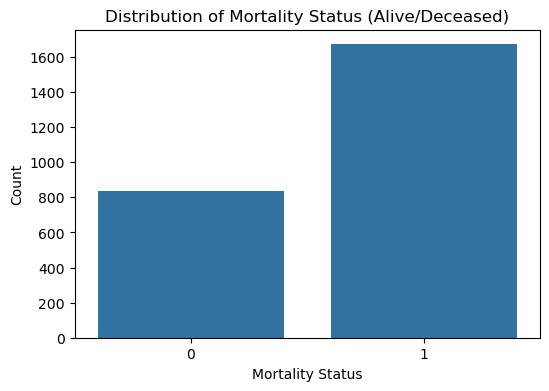

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Overall Survival Status', data=data_Frame)
plt.title('Distribution of Mortality Status (Alive/Deceased)')
plt.xlabel('Mortality Status')
plt.ylabel('Count')
plt.show()

# Model Building

### Splitting the Data into Train and Test sets

In [35]:
# defining X and y
X=data_Frame.drop("Overall Survival Status",axis=1)
y = data_Frame["Overall Survival Status"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 45)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(class_weight='balanced')

In [37]:
log.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [38]:
y_pred1 = log.predict(X_test)

In [39]:
accuracy_score_log = accuracy_score(y_pred1, y_test)
accuracy_score_log

0.7463479415670651

In [40]:
clf = classification_report(y_test,y_pred1)
print(clf)

              precision    recall  f1-score   support

           0       0.57      0.78      0.66       238
           1       0.88      0.73      0.80       515

    accuracy                           0.75       753
   macro avg       0.73      0.76      0.73       753
weighted avg       0.78      0.75      0.75       753



In [41]:
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
[[186  52]
 [139 376]]


In [42]:
roc_auc = roc_auc_score(y_test, y_pred1)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.76


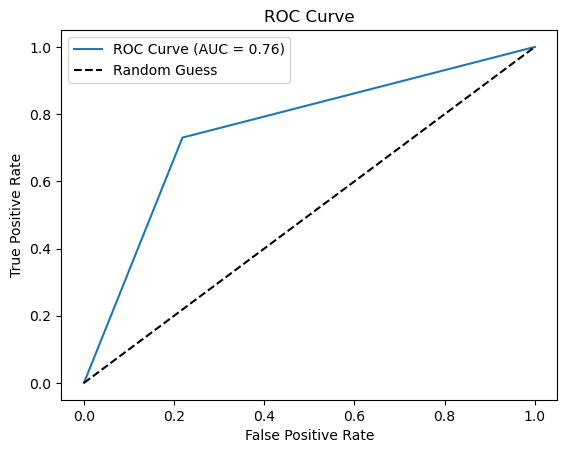

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Support Vector Machine(SVM)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=82)

In [45]:
from sklearn.svm import SVC
model= SVC(class_weight='balanced',kernel = 'rbf', C=1.0, gamma='scale', random_state=82)

In [46]:
model.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=82)

In [47]:
y_pred2=model.predict(X_test)

In [48]:
clf = classification_report(y_test,y_pred2)
print(clf)

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       267
           1       0.89      0.73      0.80       486

    accuracy                           0.76       753
   macro avg       0.76      0.78      0.76       753
weighted avg       0.79      0.76      0.77       753



In [49]:
accuracy_score_model = accuracy_score(y_pred2, y_test)
accuracy_score_model

0.7649402390438247

In [50]:
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.78


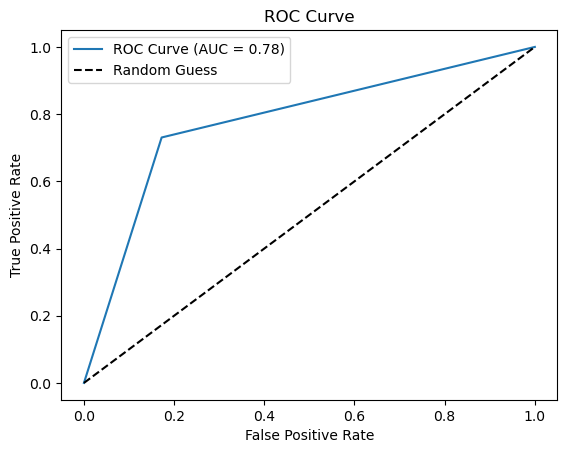

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Decision Tree

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=166)

In [66]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [67]:
dt.predict(X_test) # compare this with Y_test value
y_pred3 = dt.predict(X_test)
accuracy_score_dt = accuracy_score(y_pred3, y_test)
accuracy_score_dt

0.796812749003984

In [68]:
clf = classification_report(y_test,y_pred3)
print(clf)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       279
           1       0.83      0.85      0.84       474

    accuracy                           0.80       753
   macro avg       0.78      0.78      0.78       753
weighted avg       0.80      0.80      0.80       753



In [69]:
roc_auc = roc_auc_score(y_test, y_pred3)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.78


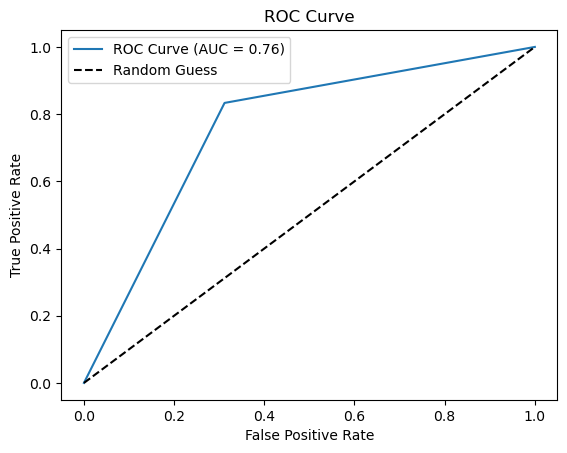

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# RandomForest 

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=22)
rf_clf.fit(X_train, y_train)
y_pred4 = rf_clf.predict(X_test)

In [71]:
rf_accuracy = metrics.accuracy_score(y_test, y_pred4)
rf_precision = metrics.precision_score(y_test, y_pred4, average='weighted')
rf_recall = metrics.recall_score(y_test, y_pred4, average='weighted')
rf_f1_score = metrics.f1_score(y_test, y_pred4, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81


In [72]:
clf = classification_report(y_test,y_pred4)
print(clf)

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       279
           1       0.82      0.90      0.86       474

    accuracy                           0.81       753
   macro avg       0.81      0.78      0.79       753
weighted avg       0.81      0.81      0.81       753



In [73]:
roc_auc = roc_auc_score(y_test, y_pred4)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.78


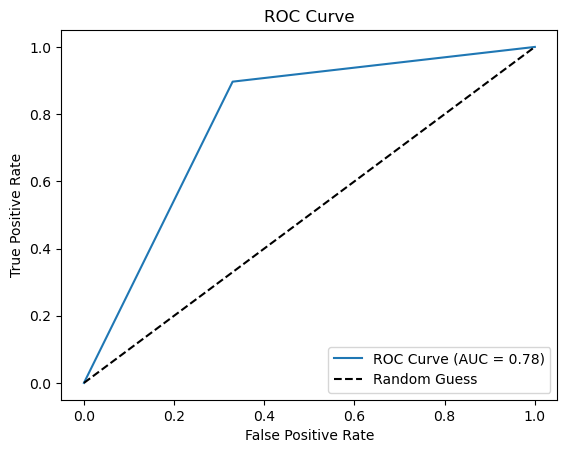

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [63]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Test Accuracy': [log.score(X_test, y_test), model.score(X_test, y_test), 
                      dt.score(X_test, y_test), rf_clf.score(X_test, y_test)]
})
display(results)

,Model,Test Accuracy
0,Logistic Regression,0.759628
1,SVM,0.738380
2,Decision Tree,0.779548
3,Random Forest,0.812749
